In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [132]:
cd \\goeppert\nlab-nas\freely_moving_ephys\ephys_recordings\041521\J538LT\

\\goeppert\nlab-nas\freely_moving_ephys\ephys_recordings\041521\J538LT


In [133]:
#cd \\goeppert\nlab-nas\freely_moving_ephys\ephys_recordings\012821\EE8P6LT_newKSmap_041821\

,Amplitude,ContamPct,KSLabel,amp,ch,depth,fr,group,n_spikes,sh
id,,,,,,,,,,
1,1608.0,7.1,mua,117.514160,0,775.0,1.203432,good,1871,0
10,1520.3,0.0,good,91.191246,2,725.0,1.059355,good,1647,0
13,3074.8,0.0,good,131.676819,3,700.0,6.031954,good,9378,0
15,1551.3,0.0,good,73.284615,4,675.0,1.358444,good,2112,0
17,1166.0,9.8,good,99.800888,4,675.0,1.445276,good,2247,0
...,...,...,...,...,...,...,...,...,...,...
227,1005.3,3.1,good,75.491440,57,150.0,6.434599,good,10004,0
228,914.8,0.0,good,77.998917,57,150.0,0.957086,good,1488,0
229,1060.5,0.0,good,75.564301,60,75.0,0.246347,good,383,0


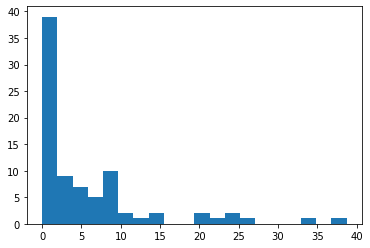

In [147]:
clust = np.load('spike_clusters.npy')
sptemp = np.load('spike_templates.npy')
templates = np.load('templates.npy')
cmap = np.load('channel_positions.npy')

# ephys_data_master holds information that is same for all recordings (i.e. cluster information + waveform)
ephys_data_master = pd.read_csv('cluster_info.tsv',sep = '\t',index_col=0)

ephys_data_master
goodcells = ephys_data_master.loc[ephys_data_master['group']=='good']
plt.hist(goodcells['ContamPct'],20)
goodcells

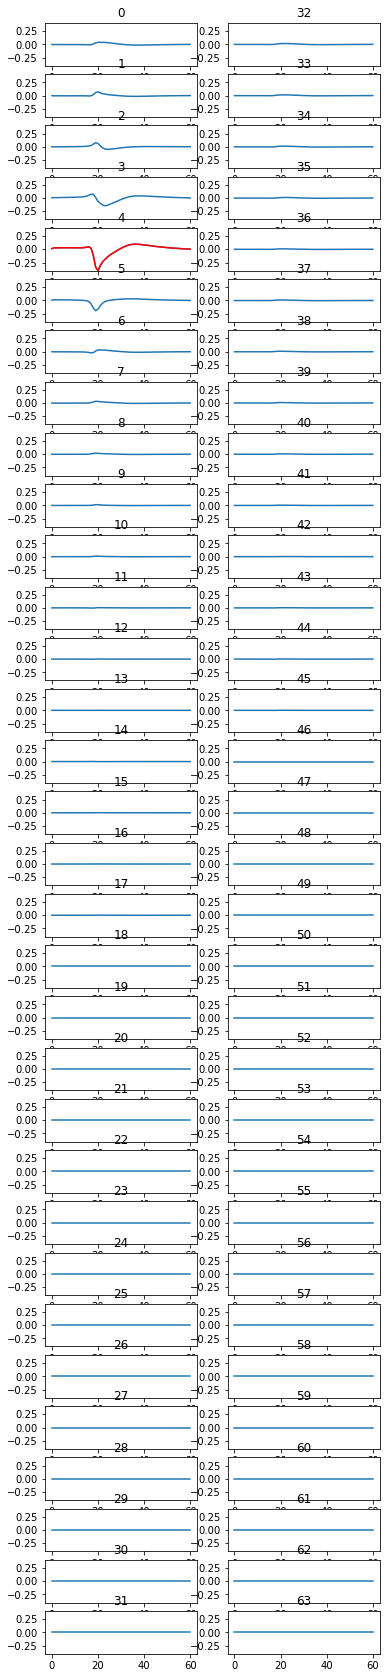

In [139]:
ind =17
ch = ephys_data_master.at[ind,'ch']
plt.figure(figsize = (6,30))
rng = np.max(np.abs(templates[ind,21:,:]))
for i in range(64):
    if i<32:
        plt.subplot(32,2,2*i+1)
    else:
        plt.subplot(32,2,2*(i-32)+2) 
#    plt.subplot(64,1,i+1)
    plt.title(str(i))
    plt.plot(templates[ind,21:,i])
    if i==ch:
        plt.plot(templates[ind,21:,i],'r')
    plt.ylim([-rng,rng])
        

In [64]:
np.where(ephys_data_master['KSLabel']=='good')


(array([ 4, 18, 29, 49, 63, 72, 73, 75, 81, 82], dtype=int64),)

In [ ]:
# insert waveforms
ephys_data_master['waveform'] = np.nan
ephys_data_master['waveform'] = ephys_data_master['waveform'].astype(object) # does this need to be an object? spikeT is an object because they are all diff length, but I don't think these need to be -cmn
for i, ind in enumerate(ephys_data_master.index):
    ephys_data_master.at[ind,'waveform'] = templates[ind,21:,ephys_data_master.at[ind,'ch']]